*UID*: 118739472 (Macy Donahoe)

*UID*: Danny's UID

*UID*: 120092572

# **CMSC426 Project 1: Color Segmentation using GMM**

# Introduction

Have you ever played with these adorable Nao robots? Click [here](http://www.youtube.com/watch?feature=player_embedded&v=Gy_wbhQxd_0) to watch a cool demo.

Nao robots are star players in RoboCup, an annual autonomous robot soccer competitions. Would you like to help us in Nao’s soccer training? We need to train Nao to detect a soccer ball and estimate the depth of the ball to know how far to kick.

Nao’s training has two phases:

- Color Segmentation using Gaussian Mixture Model (GMM)
- Ball Distance Estimation


<a name='problem'></a>
# What you need to do

To make logistics easier, we have collected camera data from Nao robot on behalf of you and saved the data in the form of color images. Click [here](https://drive.google.com/file/d/1k1dydl1Yho08isNg-_542fajXujybujH/view?usp=sharing) to download, or **run the following code block to download the training image folder to the file directory of the notebook**. The image names represent the depth of the ball from Nao robot in centimeters. -We will release the test dataset 48 hours before the deadline. **Test images are available [here](https://drive.google.com/file/d/1_qC1OnK58kYfBKZ9FUYnSmBLdfTpRmSr/view?usp=sharing) to download.**

In [165]:
# Download training images from Google Drive
import gdown
# gdown.download_folder(id="18Mx2Xc9UNFZYajYu9vfmRFlFCcna5I0J", quiet=True, use_cookies=False)

ModuleNotFoundError: No module named 'gdown'

In [ ]:
# Download testing images from Google Drive
# gdown.download_folder(id="1Yl4_5O_ZEkz_KJVs0_vS5TrZUqMYkwr4", quiet=True, use_cookies=False)

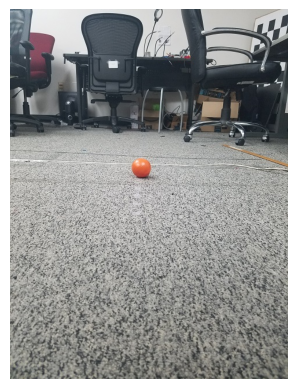

In [ ]:
# Check whether the training images were successfully imported
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

train_image = mpimg.imread('./content/train_images/106.jpg')
plt.imshow(train_image)
plt.axis("off")
plt.show()

## Problem Statement

1. Write Python code to cluster the orange ball using [Single Gaussian](https://cmsc426.github.io/colorseg/#gaussian) [30 points]

In [ ]:
import os
import numpy as np
import matplotlib.image as mpimg


def single_gaussian(test_image):

  # TODO: Read in training images
  training_images = []
  for image in os.listdir("./content/train_images"):
    training_images.append(mpimg.imread( "./content/train_images/"+str(image)))

  # TODO: Iterate over training images to extract orange pixels using masks
  extracted_orange_pixels = []
  total_pixels = 0
  total_orange_pixels = 0

  for image in training_images:
    # isolate each channel
    r = image[:, :, 0]
    g = image[:, :, 1]
    b = image[:, :, 2]

    # determine acceptable range of values per channel for orange (may need to be adjusted)
    mask = (r > 200) & (g > 70) & (g < 150) & (b < 60)

    # store the pixels that fit this mask for a given image
    extracted_orange_pixels.append(image[mask])

    # store the total number of orange pixels found across images (for prior estimation)
    total_orange_pixels += np.sum(mask)

    # store the total number of pixels visited across images (for prior estimation)
    total_pixels += image.shape[0] * image.shape[1]


  # TODO: Compute mean and covariance using MLE(Maximum Likelihood Estimation)

  # combine all extracted orange pixels into one array
  orange_pixels = np.concatenate(extracted_orange_pixels, axis=0)

  # calculate mean and covariance matrix for the idenfied orange pixels
  mean = np.mean(orange_pixels, axis=0)
  covariance_matrix = np.cov(orange_pixels, rowvar=False)

  # TODO: Compute PDF(Probability Density Function) of single gaussian model

  # will store the final PDF values per test pixel based on training data's mean and covariance
  pdf_matrix = np.zeros((test_image.shape[0], test_image.shape[1]))

  # compute the pdf per pixel in the testing image to compute the P(x|Orange), x being one pixel
  # use the mean and covariance matrix computed by the training data for this calculation to determine probability
  for outer_idx in range(0, test_image.shape[0]):
    for inner_idx in range(0, test_image.shape[1]):
      constant = 1 / (np.sqrt(2 * np.pi * np.linalg.det(covariance_matrix)))
      exponent = np.exp(-0.5 * ((test_image[outer_idx, inner_idx] - mean).T @ np.linalg.inv(covariance_matrix) @ (test_image[outer_idx, inner_idx] - mean)))
      pdf_matrix[outer_idx, inner_idx] = constant * exponent

 # TODO: Set parameters (threshold, prior)

  # estimate prior value as the ratio of orange pixels identified over total pixels process while training
  prior = total_orange_pixels/total_pixels

  # posterior = P(x | Orange) = pdf * prior value,
  posterior = pdf_matrix * prior

  # determine a starting threshold to determine when to classify a test pixel as orange
  # may need to be adjusted, the best results were found with the 20th percentile of the posterior
  threshold = np.percentile(posterior, 20)

  # create mask to show orange pixels as 1, all other pixels are 0
  masked_image = np.zeros((posterior.shape[0], posterior.shape[1]))

  for outer_idx in range(0, test_image.shape[0]):
    for inner_idx in range(0, test_image.shape[1]):
      # if the P(Orange) > threshold, then the pixel is classified as orange, in mask, change value at this pixel's postition to 1
      if(posterior[outer_idx, inner_idx] > threshold):
        masked_image[outer_idx, inner_idx] = 1

  # return information about all of the pixels classified as orange in the test image
  # not fully sure what I was supposed to return, can be adjusted based on Step 2
  return masked_image

# TODO: Send test images into algorithm to detect orange ball

# loop through each test image and pass it into this algorithm to idenity the orange pixels using the single gaussian method
masked_images = []
for image in os.listdir("./content/test_images"):
  test_image = mpimg.imread( "./content/test_images/"+str(image))
  # accessing the classification of each pixel in one test image 
  masked_img = single_gaussian(test_image)
  # storing these results in a master array across all test images
  masked_images.append(masked_img)


In [ ]:
# Show you result here -- Overlays of each test image's pixel classifications -> 1 if orange, 0 otherwise.

for img in masked_images:
    print(img)

[[(25, 42), (25, 43), (25, 44), (25, 45), (25, 46), (25, 47), (25, 48), (25, 49), (25, 50), (25, 51), (25, 52), (26, 42), (26, 43), (26, 44), (26, 45), (26, 46), (26, 47), (26, 48), (26, 49), (26, 50), (26, 51), (26, 52), (26, 53), (26, 54), (26, 55), (26, 56), (26, 57), (26, 58), (26, 59), (26, 60), (27, 42), (27, 43), (27, 44), (27, 45), (27, 46), (27, 47), (27, 48), (27, 49), (27, 50), (27, 51), (27, 52), (27, 53), (27, 54), (27, 55), (27, 56), (27, 57), (27, 58), (27, 59), (27, 60), (27, 61), (27, 62), (27, 63), (27, 64), (27, 65), (28, 42), (28, 43), (28, 44), (28, 45), (28, 46), (28, 47), (28, 48), (28, 49), (28, 50), (28, 51), (28, 52), (28, 53), (28, 54), (28, 55), (28, 56), (28, 57), (28, 58), (28, 59), (28, 60), (28, 61), (28, 62), (28, 63), (28, 64), (28, 65), (28, 66), (28, 67), (28, 68), (28, 69), (28, 70), (29, 41), (29, 42), (29, 43), (29, 44), (29, 45), (29, 46), (29, 47), (29, 48), (29, 49), (29, 50), (29, 51), (29, 52), (29, 53), (29, 54), (29, 55), (29, 56), (29, 57)

2. Write Python code to cluster the orange ball using [Gaussian Mixture Model](https://cmsc426.github.io/colorseg/#gmm) [40 points] and estimate the [distance](https://cmsc426.github.io/colorseg/#distest) to the ball [20 points]. Also, plot all the GMM ellipsoids [10 points].


You are NOT allowed to use any built-in Python package(s) like *sklearn.mixture.GaussianMixture* for GMM. To help you with code implementation, we have given the pseudocode :-)

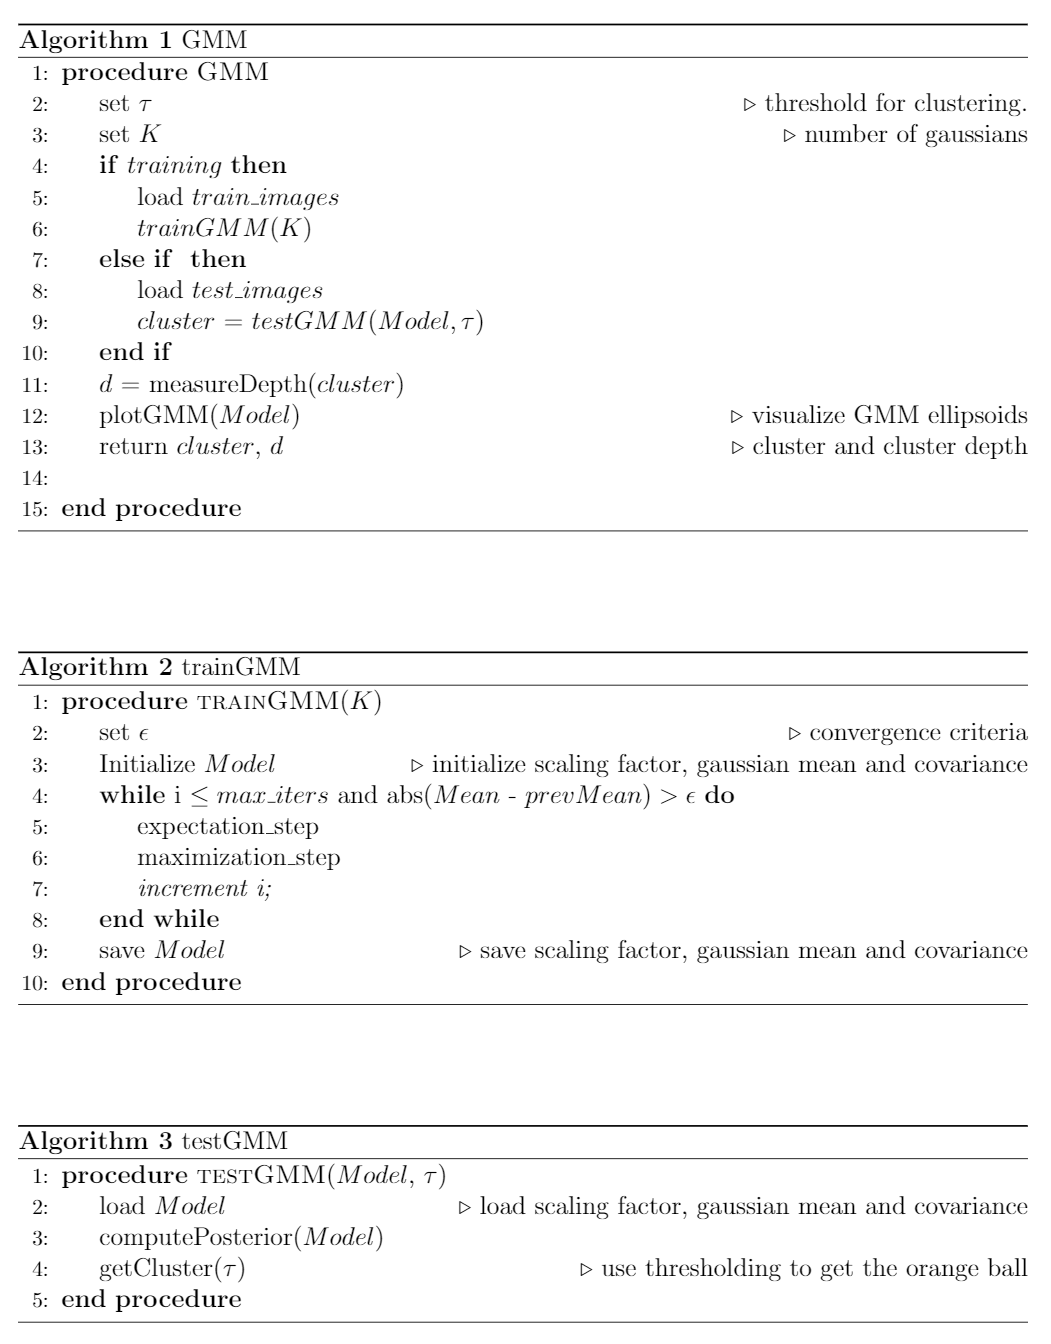

In [166]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [167]:
import os
import numpy as np
import matplotlib.image as mpimg

def trainGMM(K):
   # TODO finetune
   convergence_threshold = 1e-4
   max_iter = 100
   
   training_images = []
   for image_file in os.listdir('./content/train_images'):
      img = mpimg.imread(f'./content/train_images/{image_file}')
      training_images.append(img)
   
   orange_pixels = []
   total_pixels = 0
   
   for img_idx, image in enumerate(training_images):
      r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
      total_pixels += image.shape[0] * image.shape[1]
      
      # TODO finetune
      mask = (r > 200) & (g > 70) & (g < 150) & (b < 60) 
      
      masked_pixels = image[mask]
      if len(masked_pixels) > 0:
         orange_pixels.append(masked_pixels)
   
   orange_data = np.concatenate(orange_pixels, axis=0)
   print(orange_data)
   N = orange_data.shape[0]
   
   rng = np.random.default_rng()
   
   pi = np.ones(K) / K
   
   indices = rng.choice(N, size=K, replace=False)
   mu = orange_data[indices].copy().astype(float)
   
   overall_cov = np.cov(orange_data, rowvar=False)

   # avoid divide by zero errors
   cov = np.array([overall_cov + np.eye(3) * 1e-6 for _ in range(K)])
   
   for iteration in range(max_iter):
      print(f'  Iteration {iteration+1}/{max_iter}')
      
      alpha = np.zeros((N, K))
      
      # E Step
      for k in range(K):
         diff = orange_data - mu[k]
         
         det_cov = np.linalg.det(cov[k])
         
         inv_cov = np.linalg.inv(cov[k])
         
         constant = 1.0 / np.sqrt((2 * np.pi)**3 * det_cov)
         
         exponent_terms = []
         for j in range(N):
            exponent = -0.5 * diff[j] @ inv_cov @ diff[j]
            exponent_terms.append(exponent)
         
         exponent_array = np.array(exponent_terms)
         
         alpha[:, k] = pi[k] * constant * np.exp(exponent_array)
      
      alpha_sum = np.sum(alpha, axis=1, keepdims=True)
      alpha = alpha / (alpha_sum + 1e-10)
      
      mu_old = mu.copy()
      
      # M Step
      N_k = np.sum(alpha, axis=0)
      
      # Scaling factor Update
      pi = N_k / N
      
      # Mean update
      for k in range(K):
         if N_k[k] > 1e-10:
               mu[k] = np.sum(alpha[:, k:k+1] * orange_data, axis=0) / N_k[k]
      
      # Cov update
      for k in range(K):
         if N_k[k] > 1e-10:
            diff = orange_data - mu[k]
            weighted_cov = np.zeros((3, 3))
            
            for j in range(N):
               weighted_cov += alpha[j, k] * np.outer(diff[j], diff[j])
            
            cov[k] = weighted_cov / N_k[k]
            cov[k] += np.eye(3) * 1e-6
      
      max_mu_change = np.max([np.linalg.norm(mu[k] - mu_old[k]) for k in range(K)])
      
      if max_mu_change < convergence_threshold:
         break
   return [pi, mu, cov]

model_params = trainGMM(3)

[[208  91  58]
 [221 106  59]
 [220 105  58]
 ...
 [202  83  59]
 [202  77  55]
 [202  77  55]]
  Iteration 1/100
  Iteration 2/100
  Iteration 3/100
  Iteration 4/100
  Iteration 5/100
  Iteration 6/100
  Iteration 7/100
  Iteration 8/100
  Iteration 9/100
  Iteration 10/100
  Iteration 11/100
  Iteration 12/100
  Iteration 13/100
  Iteration 14/100
  Iteration 15/100
  Iteration 16/100
  Iteration 17/100
  Iteration 18/100
  Iteration 19/100
  Iteration 20/100
  Iteration 21/100
  Iteration 22/100
  Iteration 23/100
  Iteration 24/100
  Iteration 25/100
  Iteration 26/100
  Iteration 27/100
  Iteration 28/100
  Iteration 29/100
  Iteration 30/100
  Iteration 31/100
  Iteration 32/100
  Iteration 33/100
  Iteration 34/100
  Iteration 35/100
  Iteration 36/100
  Iteration 37/100
  Iteration 38/100
  Iteration 39/100
  Iteration 40/100
  Iteration 41/100
  Iteration 42/100
  Iteration 43/100
  Iteration 44/100
  Iteration 45/100
  Iteration 46/100
  Iteration 47/100
  Iteration 48/100
 

In [ ]:
print(model_params)

[array([0.23421614, 0.40614795, 0.35962526]), array([[212.3671658 ,  91.32397943,  58.58226975],
       [205.6151968 ,  84.8563799 ,  54.37122836],
       [211.00974988,  91.88286503,  56.56906575]]), array([[[27.88003827, 17.0383474 ,  0.55194892],
        [17.0383474 , 16.53609843,  0.68014075],
        [ 0.55194892,  0.68014075,  0.26354392]],

       [[10.13227768,  8.26807179,  0.63738344],
        [ 8.26807179, 13.0582939 ,  1.07809292],
        [ 0.63738344,  1.07809292,  8.01316914]],

       [[31.37954905, 29.07009353,  0.6421502 ],
        [29.07009353, 53.18315006,  2.96209675],
        [ 0.6421502 ,  2.96209675,  2.41731715]]])]


In [414]:
def testGMM(Model_parameters,threshold,prior):
  test_images, test_image_name = [], []

  pi, mu, cov = Model_parameters
  K = len(pi)

  for image_file in os.listdir("./content/test_images"):
    img = mpimg.imread(f'./content/test_images/{image_file}')
    test_images.append(img)
    test_image_name.append(image_file)
  
  train_data = []
  for image in test_images:
    red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]
    rgb_array = [[r,g,b] for r,g,b in zip(red.flatten(), green.flatten(), blue.flatten())]
    train_data.append(rgb_array)

  train_data = np.array(train_data)
  
  for idx, pixel_data in enumerate(train_data):
    print('Image test:')
    N = pixel_data.shape[0]
    post_prob = np.zeros((N,K))

    for k in range(K):
      diff = pixel_data - mu[k]
      det_cov = np.linalg.det(cov[k])
      
      inv_cov = np.linalg.inv(cov[k])
      
      constant = 1.0 / np.sqrt((2 * np.pi)**3 * det_cov)
      
      exponent_terms = []
      for j in range(N):
        exponent = -0.5 * diff[j] @ inv_cov @ diff[j]
        exponent_terms.append(exponent)
      
      exponent_array = np.array(exponent_terms)
      
      post_prob[:, k] = pi[k] * constant * np.exp(exponent_array)

    # TODO putting the entire image into argmax rn, check is basically just saying that every image has orange
    prob_class = np.argmax(post_prob)
    if prob_class > threshold:
      print('check')
      # TODO is orange ball??

      # TODO Make a mask for each image
      # get dimensions of the image
      l, w, _ = test_images[idx].shape
      r, g, b = pixel_data[:, 0].reshape(l, w), pixel_data[:, 1].reshape(l, w), pixel_data[:, 2].reshape(l, w)

      # boolean mask
      mask = mask = (r >= 180) & (r <= 255) & (g >= 30) & (g <= 180) & (b >= 0) & (b <= 80)

      masked_img = np.zeros((l, w, 3), dtype=pixel_data.dtype)

      for i in range(3):
          channel = pixel_data[:, i].reshape(l, w)
          masked_img[:, :, i][mask] = channel[mask]

      # save prediction to folder
      path = f'./content/result/prediction_{test_image_name[idx]}' 
      os.makedirs(os.path.dirname(path), exist_ok=True)
      mpimg.imsave(path, masked_img)
      
# return cluster parameters


In [415]:
testGMM(model_params, 0.01, 0)

Image test:
check
Image test:
check
Image test:
check
Image test:
check
Image test:
check
Image test:
check
Image test:
check
Image test:
check


In [ ]:
def measureDepth(cluster_parameters):
  # hint: fit a simple parametric model (choose a model of your choice) to estimate distance from different parameters based on the image. For eg. area of the ball on the image decreases with distance (generally follows a inverse square curve).
  # TODO: Identify the pixels which belong to the orange ball

  # TODO: Use the data provided and any feature you like to obtain a model to estimate distance. eg. area of the ball on the image decreases with distance (generally follows a inverse square curve
  # The bigger the area, the smaller the distance

  area = 0
  for pixel in cluster_parameters:
    # if pixel = 1, then classified as orange, add to area calculation
    if(pixel == 1):
      area = area + 1

  # No orange pixels found, return an infinite distance (divide by zero error)
  if area == 0:
    return np.inf
  
  distance = 1 / np.sqrt(area)

  return distance

In [ ]:
def plotGMM(model_parameters, distance):
    _, mu, cov = model_parameters

    # TODO remove once model is working
    # rng = np.random.default_rng()
    # mu = rng.integers(low=0, high=255, size=(10, 3))
    # cov = rng.integers(low=0, high=255, size=(10, 3))

    # Create colors from mu values (center colors)
    colors = []
    for i in range(len(mu)):
        r, g, b = mu[i]
        colors.append((r/255, g/255, b/255))

    # Create the plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(projection='3d')

    # Normalized distance. Our measureDepth returns distances using inversed square function 1/sqrt(x), thus
    # our distances will be relatively small, considering the images are 480x640. Piazza said the distance copmutation
    # is unitless and to go with your own logic, so I chose the conversion of hectometers to feet.
    normalized_distance = np.round((distance) / 0.00328084, 2)

    # Plot ellipsoids
    for i in range(len(mu)):
        plot_ellipsoid_3d(ax, mu[i], cov[i], colors[i], normalized_distance)
    
    r, g, b = mu[:, 0], mu[:, 1], mu[:, 2]
    ax.scatter(r, g, b, c=colors, s=100, edgecolor='black', linewidth=1.5, label='Cluster Centers')
    
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    ax.legend()
        
    ax.text2D(0.02, 0.95, f"d={normalized_distance}ft", transform=ax.transAxes, fontsize=14, color='black')
    # ax.text2D(0.02, 0.9, f"θ={angle}°", transform=ax.transAxes, fontsize=14, color='black')

    plt.tight_layout()
    plt.show()

def plot_ellipsoid_3d(ax, mu, cov, color, distance):
    # Generate points on a unit sphere
    n_points = 50
    u = np.linspace(0, 2 * np.pi, n_points)
    v = np.linspace(0, np.pi, n_points)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones_like(u), np.cos(v))
    
    # Plotting two std deviations
    # Can finetune to adjust distance scaling
    x_scaled = x * np.sqrt(cov[0]) * (np.sqrt(distance)) + mu[0]
    y_scaled = y * np.sqrt(cov[1]) * (np.sqrt(distance)) + mu[1]
    z_scaled = z * np.sqrt(cov[2]) * (np.sqrt(distance)) + mu[2]
    
    # Plot the surface
    ax.plot_surface(x_scaled, y_scaled, z_scaled, 
                    color=color, alpha=0.3, edgecolor='black', linewidth=0.1)


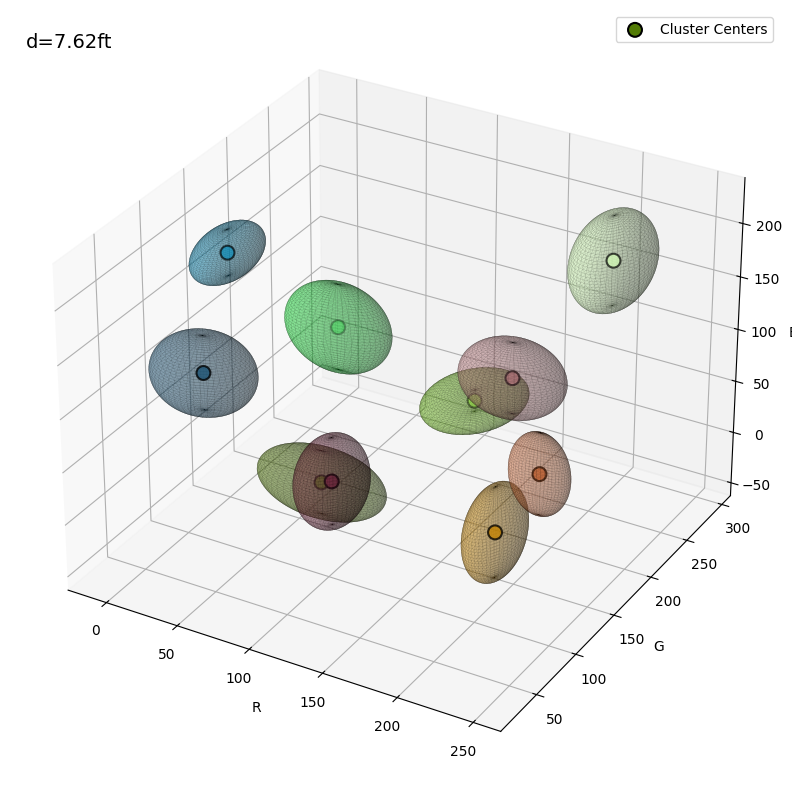

In [344]:
plotGMM([[],[],[]], 0.025)

In [ ]:
# Main function (Algorithm 1 in the pseudocode above)

# -Write Python code to cluster the orange ball using Gaussian Mixture Model [40 points].

# -Estimate the distance to the ball [20 points].

# -Plot all the GMM ellipsoids [10 points].

def GMM(threshold=0.1, K=2, mode_flag=0):
  # (Set it to 0 for training, 1 for testing)
  if mode_flag == 0:
    model_parameters = trainGMM(K)
  else:
    clusters = testGMM(model_parameters, threshold)

  # TODO figure out what orange cluster is
  orange_cluster = clusters[0]
  distance = measureDepth(orange_cluster)
  plotGMM(model_parameters, distance)

# Video Lecture
Click [here](https://www.youtube.com/watch?v=D5AcaFMY_BI) for a video lecture to help you better understand the project.

## Report
For each section of the project, explain briefly what you did, and describe any interesting problems you encountered and/or solutions you implemented. You must include the following details in your writeup:

- Your choice of color space, initialization method and number of gaussians in the GMM
- Explain why GMM is better than single gaussian
- Present your distance estimate and cluster segmentation results for each test image
- Explain strengths and limitations of your algorithm. Also, explain why the algorithm failed on some test images

As usual, your report must be full English sentences, not commented code. There is a word limit of 1500 words and no minimum length requirement.

## ***add your report here***


# Submission Guidelines

**If your submission does not comply with the following guidelines, you’ll be given ZERO credit.**

Your submission on ELMS(Canvas) must be a pdf file, following the naming convention **YourDirectoryID_proj1.pdf**. For example, xyz123_proj1.pdf.

**All your results and report should be included in this notebook. After you finished all, please export the notebook as a pdf file and submit it to Gradescope
.**

# Collaboration Policy
You are encouraged to discuss the ideas with your peers. However, the code should be your own, and should be the result of you exercising your own understanding of it. If you reference anyone else’s code in writing your project, you must properly cite it in your code (in comments) and your writeup. For the full honor code refer to the CMSC426 Fall 2025
 website.